# Creating plots to visualize the distribution of cancer risk from industrial pollution across Alabama

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gridspaces_df = pd.read_csv("../data/al_grid.csv")
gridspaces_df

,X,Y,Total,Not Hispanic or Latino,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,...,gridcode,pop,ilcr,ilcr_2014,ilcr_2015,ilcr_2016,ilcr_2017,ilcr_2018,cluster_id,centerpoint
0,1035,1482,411.912900,405.766233,21.020359,376.270580,2.460665,0.000000,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,1035,1481,1143.021901,1114.305927,53.729173,1046.875416,0.536457,0.000000,0.0,1.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,1036,1482,723.120458,705.572521,20.577286,679.527128,1.000000,0.000000,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,1036,1483,495.929274,495.279686,3.317756,486.365985,1.152975,0.000000,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,937,1084,580.401346,567.534888,308.349776,249.358991,1.693364,1.108809,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208186,998,1225,7.106532,7.106532,7.056486,0.050046,0.000000,0.000000,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
208187,998,1224,7.106532,7.106532,7.056486,0.050046,0.000000,0.000000,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
208188,998,1223,7.106532,7.106532,7.056486,0.050046,0.000000,0.000000,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
208189,998,1222,7.106532,7.106532,7.056486,0.050046,0.000000,0.000000,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [3]:
hotspots_df = pd.read_csv("../data/al_hotspots.csv")
hotspots_df

,X,Y,Total,Not Hispanic or Latino,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,...,ilcr_2014,ilcr_2015,ilcr_2016,ilcr_2017,ilcr_2018,cluster_id,centerpoint,id,place,state
0,NaN,NaN,75995.902735,73001.015513,50587.096755,20527.429487,271.823107,485.405263,28.272948,87.562714,...,6.063212e-05,5.052737e-05,6.431504e-06,2.095866e-05,1.313875e-05,5.0,NaN,5,Anniston,Alabama
1,NaN,NaN,732.588576,722.693401,671.073482,27.776443,3.124629,1.079520,0.000000,0.000000,...,4.157673e-06,8.011045e-06,7.296844e-06,6.413909e-05,6.441228e-05,8.0,NaN,8,Bryant,Alabama
2,NaN,NaN,1271.958931,1182.538458,1143.090704,2.000673,7.614447,0.096237,0.000000,1.000000,...,4.380227e-05,4.440300e-05,4.308570e-05,4.480531e-05,4.090282e-05,75.0,NaN,75,Rainsville,Alabama
3,NaN,NaN,28812.583383,24733.338242,14925.838560,8926.850910,167.580762,176.536183,45.374026,34.022584,...,2.510172e-05,2.660013e-05,2.901144e-05,5.056701e-05,3.546349e-05,264.0,NaN,264,Decatur,Alabama
4,NaN,NaN,22569.682750,21881.638524,2311.553191,19306.693899,37.801321,38.058639,17.461165,11.036264,...,4.673696e-05,4.573113e-05,4.733405e-05,1.880756e-05,1.542121e-05,417.0,NaN,417,Birmingham,Alabama
5,NaN,NaN,860.142562,859.613707,6.605539,851.098135,0.000000,0.000000,0.000000,0.000000,...,1.453047e-05,1.508683e-05,1.456241e-05,1.909339e-05,1.890980e-05,970.0,NaN,970,Tuscaloosa,Alabama
6,NaN,NaN,15.195618,14.954778,0.373288,14.521280,0.000000,0.000000,0.000000,0.000000,...,1.162024e-04,8.401202e-05,9.620304e-05,3.130923e-07,1.211081e-05,1364.0,NaN,1364,Montgomery,Alabama
7,NaN,NaN,7663.325676,6871.258949,5480.368370,1193.868026,31.392113,47.046223,1.000039,10.875744,...,7.735604e-06,1.590975e-05,1.179348e-05,1.849598e-05,3.296440e-05,1400.0,NaN,1400,Foley,Alabama
8,NaN,NaN,405.694716,405.151985,244.659238,156.163937,0.785152,2.693473,0.503520,0.000000,...,5.637152e-05,3.604668e-05,3.684048e-05,4.131201e-05,6.045357e-05,2185.0,NaN,2185,Roanoke,Alabama
9,NaN,NaN,1.359666,1.359666,1.359666,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.474942e-05,1.468861e-05,1.461600e-05,1.462517e-05,1.464145e-05,2339.0,NaN,2339,Cherokee,Alabama


## Resetting gridspace ILCR to its original value
For the ease of filtering

In [4]:
gridspaces_df["ilcr"] = gridspaces_df["ilcr"] / 10000

## Plotting distribution of population across cancer risk bins

In [5]:
bins = [(1 / ((10 - i) * 10000)) for i in range(10)] + [1]

In [6]:
race_cols = [
    'White alone',
    'Black or African American alone',
    'American Indian and Alaska Native alone', 
    'Asian alone',
    'Native Hawaiian and Other Pacific Islander alone',
    'Some Other Race alone',
    'Two or More Races', 
    'Hispanic or Latino'
]

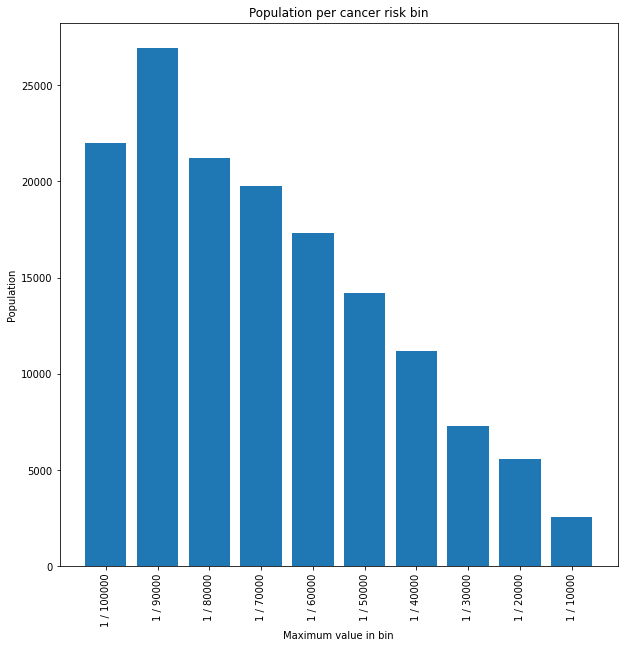

In [7]:
from math import ceil

plt.figure(figsize=(10,10))

labels = []
pops = []
data = []

for i in range(len(bins) - 1):
    row_data = []

    bin_str = "1 / " + str(ceil((1 / bins[i])))
    row_data.append(bin_str)

    bin_group = gridspaces_df.loc[(gridspaces_df["ilcr"] >= bins[i]) & (gridspaces_df["ilcr"] < bins[i + 1])]

    pop = bin_group["Total"].sum()
    row_data.append(pop)
    
    for col in race_cols:
        race_total = bin_group[col].sum()
        row_data.append(race_total)

    pops.append(pop)
    data.append(row_data)
    labels.append(bin_str)

# Create DataFrame with sums from each demographic groups from each group
cancer_groups = pd.DataFrame(data, columns=["Maximum value in bin", "Total"] + race_cols)
    
plt.bar(labels, pops)
plt.xticks(rotation=90)
plt.xlabel("Maximum value in bin")
plt.ylabel("Population")
plt.title("Population per cancer risk bin")
plt.show()

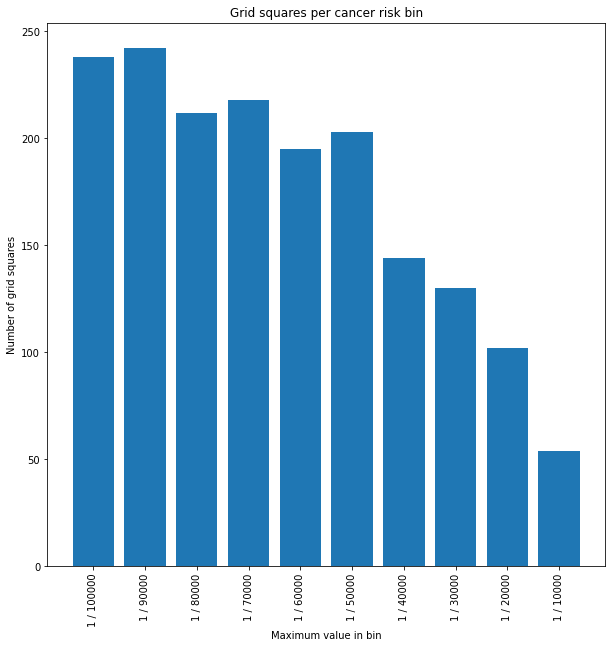

In [8]:
plt.figure(figsize=(10,10))

pops = []
labels = []

for i in range(len(bins) - 1):

    bin_str = "1 / " + str(ceil((1 / bins[i])))

    bin_group = gridspaces_df.loc[(gridspaces_df["ilcr"] >= bins[i]) & (gridspaces_df["ilcr"] < bins[i + 1])]

    pop = len(bin_group)

    pops.append(pop)
    labels.append(bin_str)
    
plt.bar(labels, pops)
plt.xticks(rotation=90)
plt.xlabel("Maximum value in bin")
plt.ylabel("Number of grid squares")
plt.title("Grid squares per cancer risk bin")
plt.show()

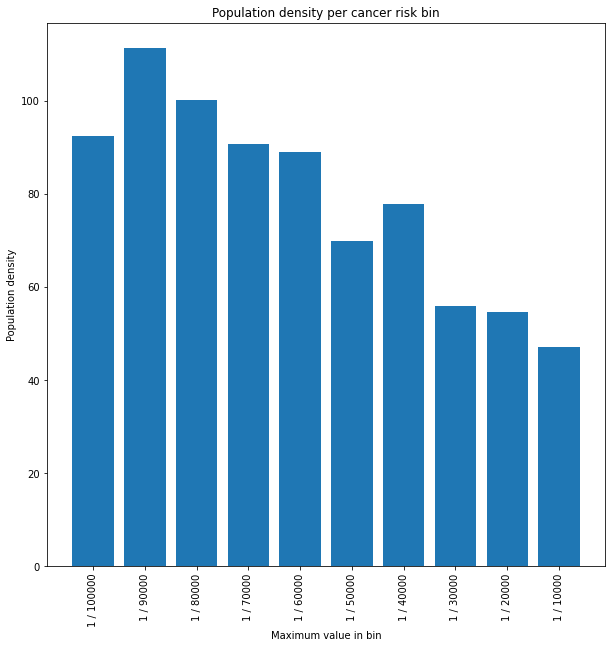

In [9]:
plt.figure(figsize=(10,10))

pops = []
labels = []

for i in range(len(bins) - 1):

    bin_str = "1 / " + str(ceil((1 / bins[i])))

    bin_group = gridspaces_df.loc[(gridspaces_df["ilcr"] >= bins[i]) & (gridspaces_df["ilcr"] < bins[i + 1])]

    pop = bin_group["Total"].sum() / len(bin_group)

    pops.append(pop)
    labels.append(bin_str)
    
plt.bar(labels, pops)
plt.xticks(rotation=90)
plt.xlabel("Maximum value in bin")
plt.ylabel("Population density")
plt.title("Population density per cancer risk bin")
plt.show()

In [10]:
print("All of AL population density:")
gridspaces_df["Total"].sum() / len(gridspaces_df)

All of AL population density:


22.958359928099675

In [11]:
gridspaces_df.loc[gridspaces_df["Total"] != 0]["Total"].mean()

24.882861130991362

In [12]:
print("All of AL population density:")
gridspaces_df[gridspaces_df["ilcr"] == 0]["Total"].sum() / len(gridspaces_df[gridspaces_df["ilcr"] == 0])

All of AL population density:


22.434757581527034

## Normalized demographic data across each bin

In [13]:
for col in race_cols:
    cancer_groups[col + " %"] = cancer_groups[col] / cancer_groups["Total"]

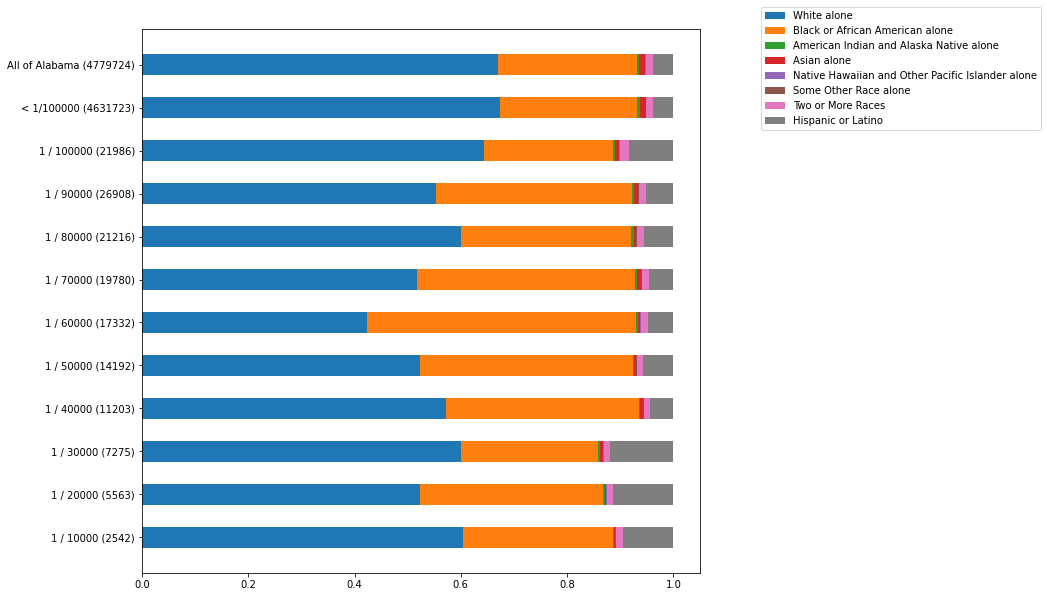

In [18]:
plt.figure(figsize=(10,10))

data = cancer_groups.iloc[::-1].reset_index(drop=True)

al_total = gridspaces_df["Total"].sum()
non_hotspot_total = gridspaces_df.loc[gridspaces_df["ilcr"] == 0, "Total"].sum()

names = (data["Maximum value in bin"] + " (" + data["Total"].astype(int).astype(str) + ")").tolist() + [f"< 1/100000 ({round(non_hotspot_total)})", f"All of Alabama ({round(al_total)})"]

percs = []

# Assertion: all rows will be converted to bars and placed on same plot
for col in race_cols:
    non_hotspot = gridspaces_df.loc[gridspaces_df["ilcr"] == 0, col].sum() / non_hotspot_total
    all_al = gridspaces_df[col].sum() / al_total

    perc = pd.Series(data[col + " %"].tolist() + [non_hotspot, all_al])

    plt.barh(names, perc, 0.5, left=sum(percs))
    percs.append(perc)

plt.legend([f"{race_cols[i]}" for i in range(len(race_cols))], bbox_to_anchor=(1.1, 1.05))
plt.show()